In [335]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()
# Load breast cancer dataset
cancer = datasets.load_breast_cancer(as_frame=True)
df = cancer.frame

# Single out the 'mean radius' and 'mean texture' features
X = df[['mean radius','mean texture']].values
X_complete = df.drop(columns="target").values
y = df['target'].values

# Change malignant tumors representation to 1, and benign to -1.
y = np.where(y == 0, 1, -1)
print(len(y))

569


In [292]:

class Perceptron:
    def __init__(self, learning_rate=0.05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.errors = None
        self.bias = None

    def train(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        self.errors = []
        self.bias = 0

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0)
            if errors == 0:
                break
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [326]:
# Instantiate two perceptron objects, one on just mean radius and mean texture, and the other on all the features and train both of them with proper step sizes.
perceptron_complete = Perceptron(learning_rate=0.0000001,epochs=100000).train(X_complete,y)
perceptron_2_feature = Perceptron(learning_rate=0.0001,epochs=100000).train(X,y)

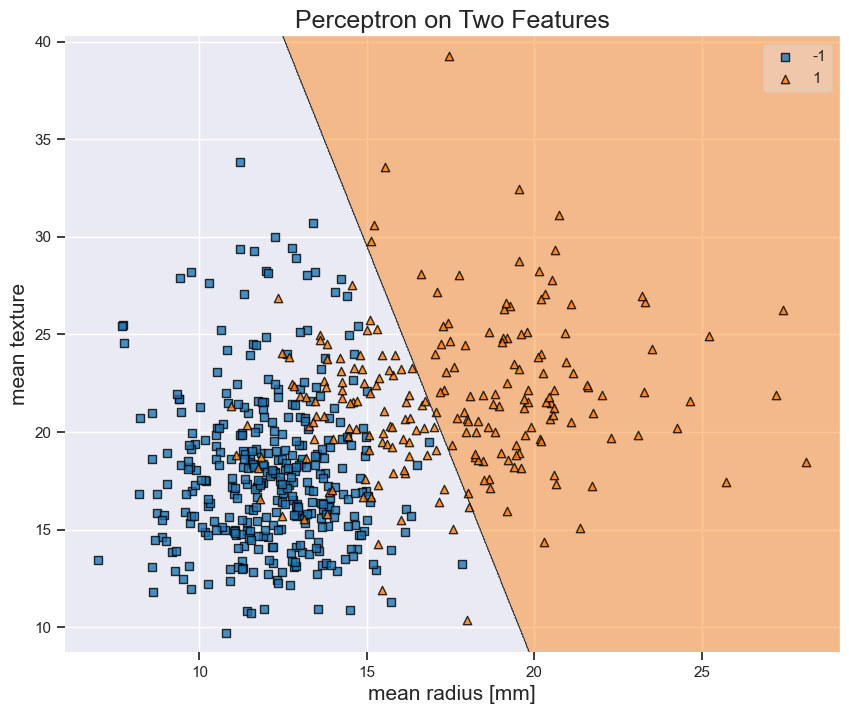

In [327]:

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = perceptron_2_feature)
plt.title("Perceptron on Two Features", fontsize = 18)
plt.xlabel("mean radius [mm]", fontsize = 15)
plt.ylabel("mean texture", fontsize = 15)
plt.show()

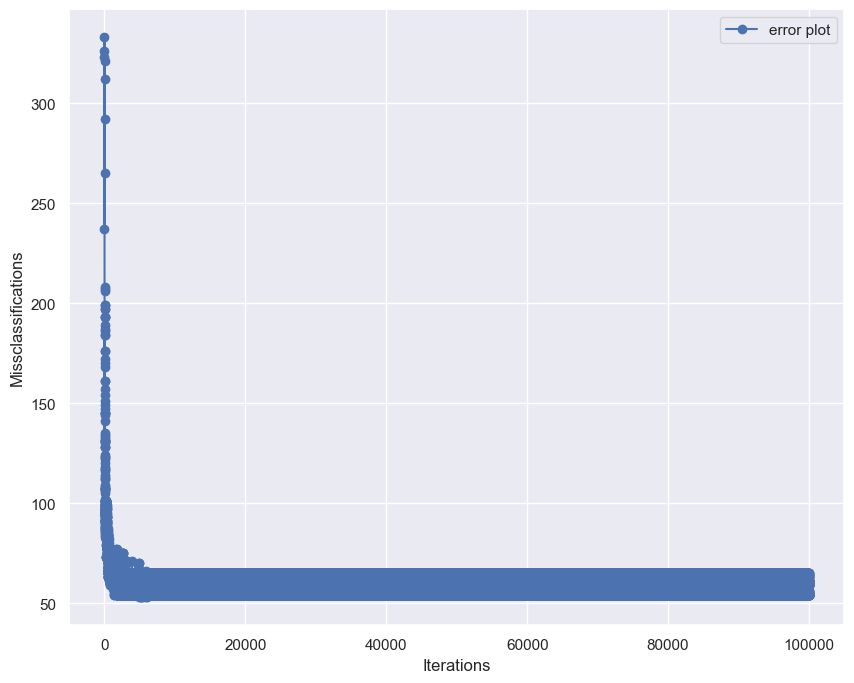

In [328]:


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(perceptron_2_feature.errors)+1), perceptron_2_feature.errors,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

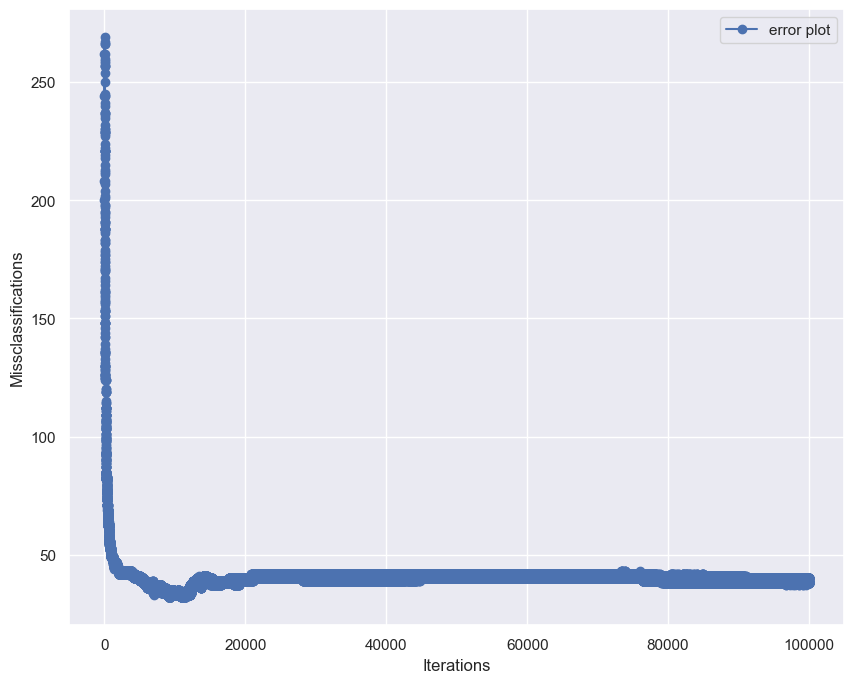

In [329]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(perceptron_complete.errors)+1), perceptron_complete.errors,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

In [331]:
# Maximum separation reached in any epoch for each perceptron.
print(min(perceptron_complete.errors))
print(min(perceptron_2_feature.errors))

32
53


Conclusion:
The perceptron algorithm is most effective when the data is linearly separable, because it can successfully separate data into two categories in a finite number of iterations. In most real world applications, data is not linearly separable, as is the case with this breast cancer dataset. I felt that mean texture and mean radius could be two relatively important features, so I singled them out. Then, I ran the perceptron algorithm on just those two features as well as all of them. I chose my step sizes by trial and error, and discovered that with more features, a smaller step size is important. On the two features that I chose, the malignant (1) cancer is clearly not separable from the benign (-1) cancer. So, the ideal end result of the algorithm is to minimize the number of errors when separating the data, so that a prediction at least is correct with high probability. Because of this, the algorithm will oscillate between solutions that have close to the minimal amount of possible errors. This behavior can be seen for both the two-featured perceptron and the full-featured one, where some minimal amount of errors is approached, followed by oscillations around it. It is expected that the full-featured model should do a better job minimizing errors than the two-featured model because any separation found for the two-featured model is feasible for the full-featured model. A simple comparison of the minimal number of errors between the two-featured and full-featured perceptron models shows that including all 30 features cuts the amount of errors almost in half. So, while the perceptron lacks some accuracy when data is not linearly separable, if there are a large number of relevant features, it can reach a high accuracy. In this case, there are 569 data points, so the perceptron model should be accurate about (569-32)/569 = 94% of the time.